<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

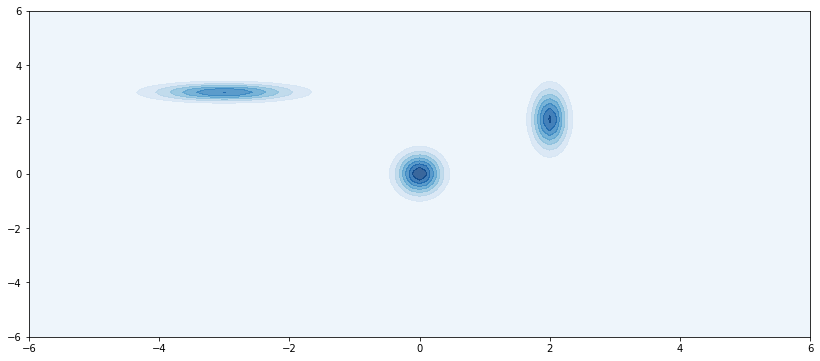

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pomegranate import *
d1 = MultivariateGaussianDistribution([0, 0], [[0.05, 0], [0, 0.25]])
d2 = MultivariateGaussianDistribution([2, 2], [[0.03, 0], [0, 0.5]])
d3 = MultivariateGaussianDistribution([-3, 3], [[0.5, 0], [0, 0.045]])
model = GeneralMixtureModel([d1, d2, d3], weights=[0.33, 0.33, 0.34])
# df = pd.DataFrame(data, columns=["x", "y"])
# Our 2-dimensional distribution will be over variables X and Y
x = numpy.arange(-6, 6.1, .1)
y = numpy.arange(-6, 6.1, .1)

xx, yy = numpy.meshgrid(x, y)
x_ = numpy.array(list(zip(xx.flatten(), yy.flatten())))
p3 = model.probability(x_).reshape(len(x), len(y))
plt.figure(figsize=(14, 6))
plt.contourf(xx, yy, p3, cmap='Blues', alpha=0.8)

plt.show()


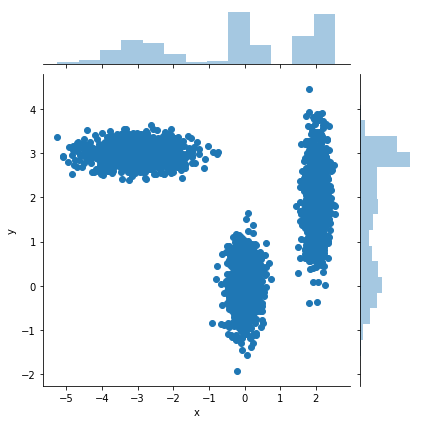

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
data = model.sample(3000)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);


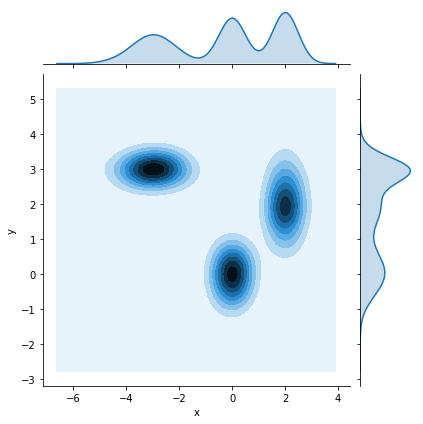

In [46]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

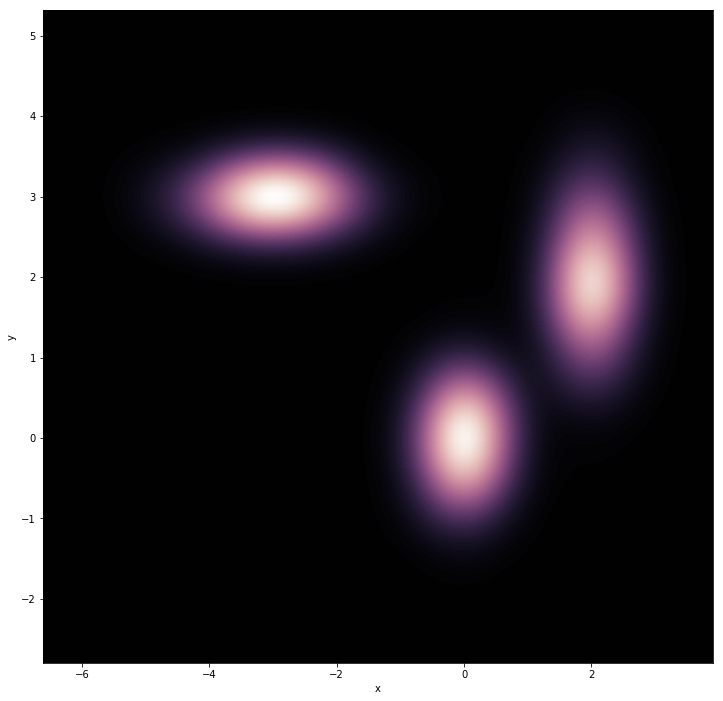

In [47]:
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=120, shade=True);

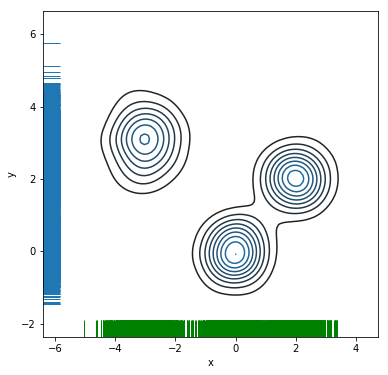

In [35]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

Text(-3,5,'Second Dist')

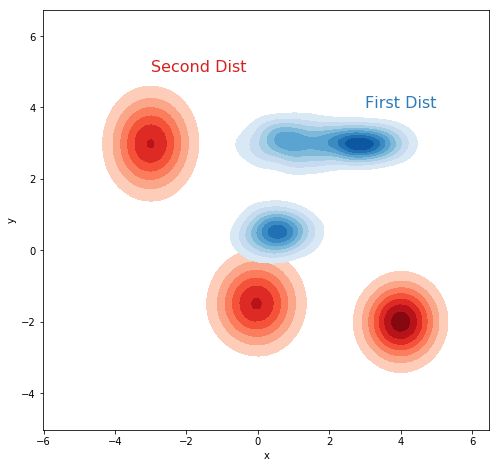

In [41]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

d1a = MultivariateGaussianDistribution([0, -1.5], [[0.15, 0], [0, 0.35]])
d2a = MultivariateGaussianDistribution([4, -2], [[0.05, 0], [0, 0.25]])
d3a = MultivariateGaussianDistribution([-3, 3], [[0.12, 0], [0, 0.45]])
modela = GeneralMixtureModel([d1a, d2a, d3a], weights=[0.33, 0.33, 0.34])

d1b = MultivariateGaussianDistribution([3, 3], [[0.45, 0], [0, 0.05]])
d2b = MultivariateGaussianDistribution([0.5, 0.5], [[0.35, 0], [0, 0.125]])
d3b = MultivariateGaussianDistribution([1, 3], [[0.65, 0], [0, 0.145]])
modelb = GeneralMixtureModel([d1b, d2b, d3b], weights=[0.33, 0.33, 0.34])


# Our 2-dimensional distribution will be over variables X and Y
x = numpy.arange(-6, 6.1, .1)
y = numpy.arange(-6, 6.1, .1)

xx, yy = numpy.meshgrid(x, y)
x_ = numpy.array(list(zip(xx.flatten(), yy.flatten())))

pa = modela.probability(x_).reshape(len(x), len(y))
pb = modelb.probability(x_).reshape(len(x), len(y))

dataa = modela.sample(3000)
dfa = pd.DataFrame(dataa, columns=["x", "y"])

datab = modelb.sample(3000)
dfb = pd.DataFrame(datab, columns=["x", "y"])


# Draw the two density plots
ax = sns.kdeplot(dfa.x, dfa.y,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(dfb.x, dfb.y,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(3, 4, "First Dist", size=16, color=blue)
ax.text(-3, 5, "Second Dist", size=16, color=red)

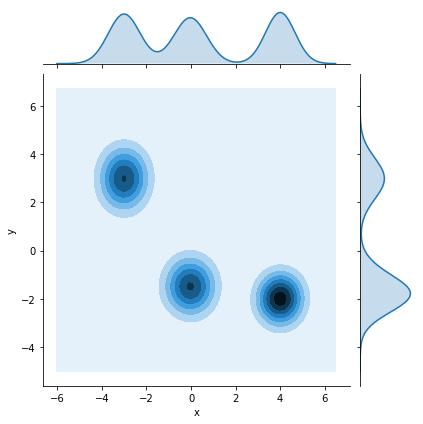

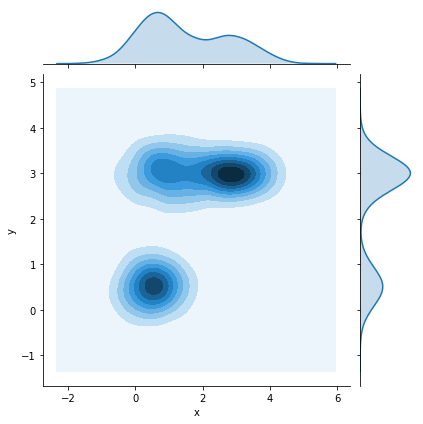

In [42]:
sns.jointplot(x="x", y="y", data=dfa, kind="kde");
sns.jointplot(x="x", y="y", data=dfb, kind="kde");